In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

In [3]:
titanic = pd.read_csv("../data/titanic.csv")

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic.drop(columns='Cabin',axis = 1 ,inplace=True)

In [9]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

In [10]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [11]:
titanic['Age'] = titanic.groupby('Pclass')['Age'].transform(lambda x : x.fillna(x.median()))

In [12]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [14]:
titanic['FamilySize'] = titanic['Parch'] + titanic['SibSp'] + 1


In [15]:
titanic['Alone'] = titanic['FamilySize'].apply(lambda x : 'Yes' if x == 1 else 'No')

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Yes


In [17]:
titanic.drop('Ticket', axis=1, inplace=True)


In [18]:
titanic['Pclass'] = titanic['Pclass'].astype(int)

# Visualization

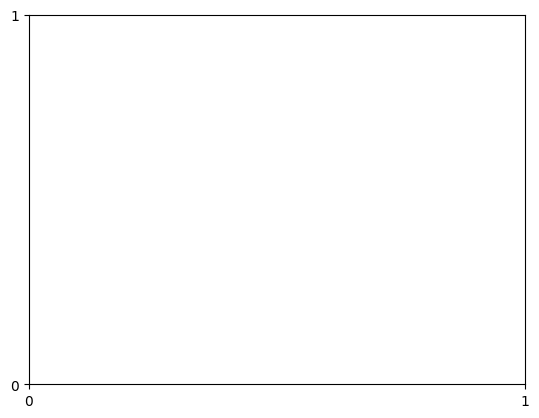

In [19]:
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

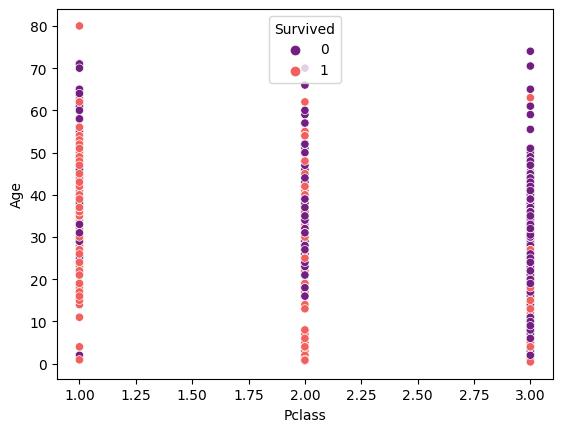

In [20]:
sns.scatterplot(x = 'Pclass', y = 'Age',data = titanic,palette = 'magma',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

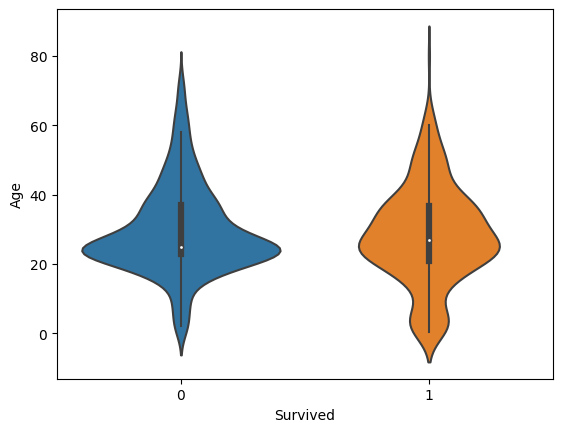

In [21]:
sns.violinplot(data=titanic, x="Survived", y="Age")

<AxesSubplot:xlabel='FamilySize', ylabel='Percent'>

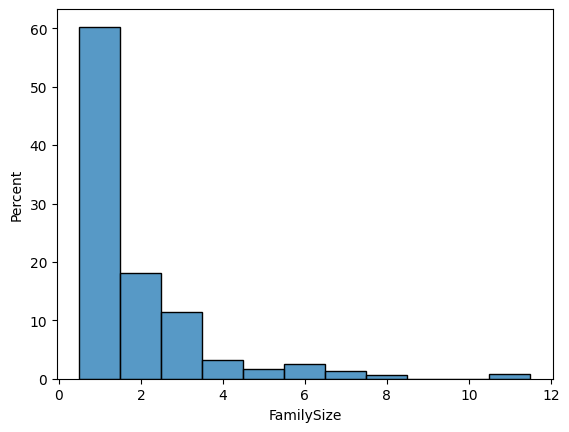

In [22]:
sns.histplot(x='FamilySize', data=titanic, stat='percent', discrete=True)

In [23]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'FamilySize', 'Alone'],
      dtype='object')

(-1.110527929435086,
 1.1005013696949746,
 -1.1211356887777435,
 1.113757540143789)

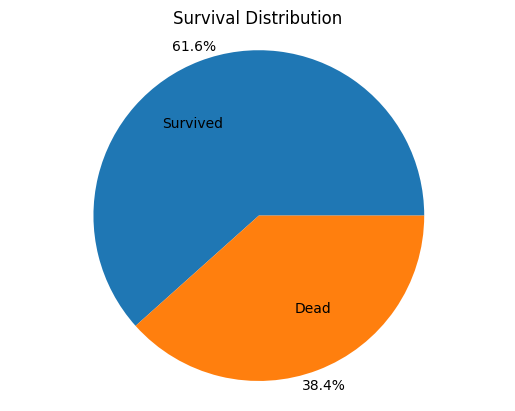

In [24]:
survival_count = titanic['Survived'].value_counts()
label = "Survived","Dead"
plt.pie(survival_count,labels=label, autopct='%1.1f%%',pctdistance=1.1,labeldistance=0.6)
plt.title("Survival Distribution")
plt.axis('equal')

Text(0.5, 1.0, 'Town Distribution')

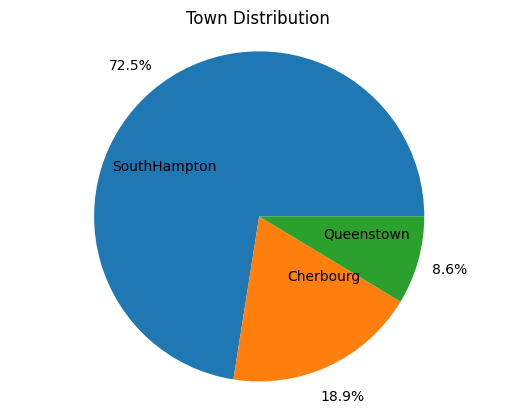

In [25]:
embark_count = titanic['Embarked'].value_counts()
plt.pie(embark_count,labels = ["SouthHampton","Cherbourg","Queenstown"],autopct='%1.1f%%',pctdistance=1.2,labeldistance=0.4)
plt.axis('equal')
plt.title("Town Distribution")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

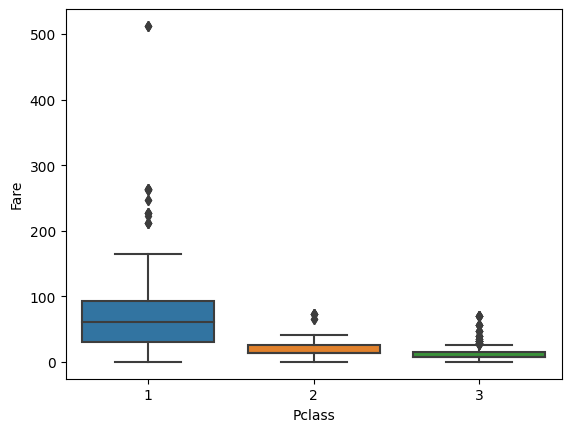

In [26]:
sns.boxplot(data = titanic,x= 'Pclass',y = 'Fare')

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

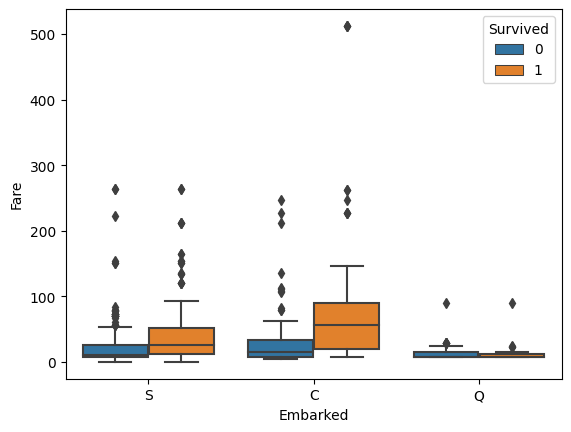

In [27]:
sns.boxplot(x = 'Embarked',y = 'Fare',data=titanic,hue='Survived')

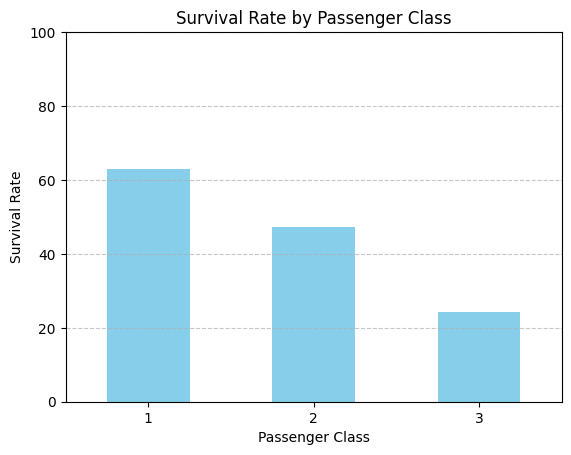

In [28]:
survival_rate_by_pclass = titanic.groupby('Pclass')['Survived'].mean()
survival_rate_by_pclass = survival_rate_by_pclass*100
survival_rate_by_pclass.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Text(0, 0.5, 'Survival Rate')

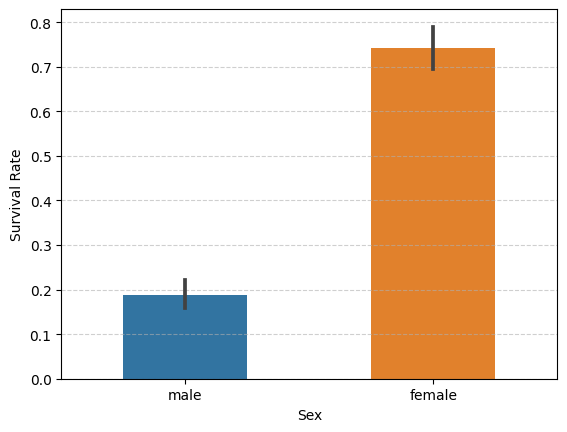

In [32]:
sns.barplot(x = 'Sex',y = 'Survived',data=titanic,width=0.5)
plt.grid(axis = 'y',linestyle ='--',alpha= 0.6)
plt.ylabel("Survival Rate")


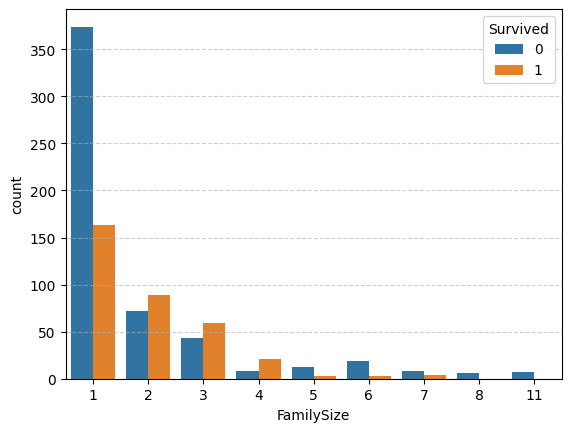

In [30]:
sns.countplot(x = 'FamilySize',hue='Survived',data=titanic)
plt.grid(axis='y',linestyle = '--',alpha = 0.6)

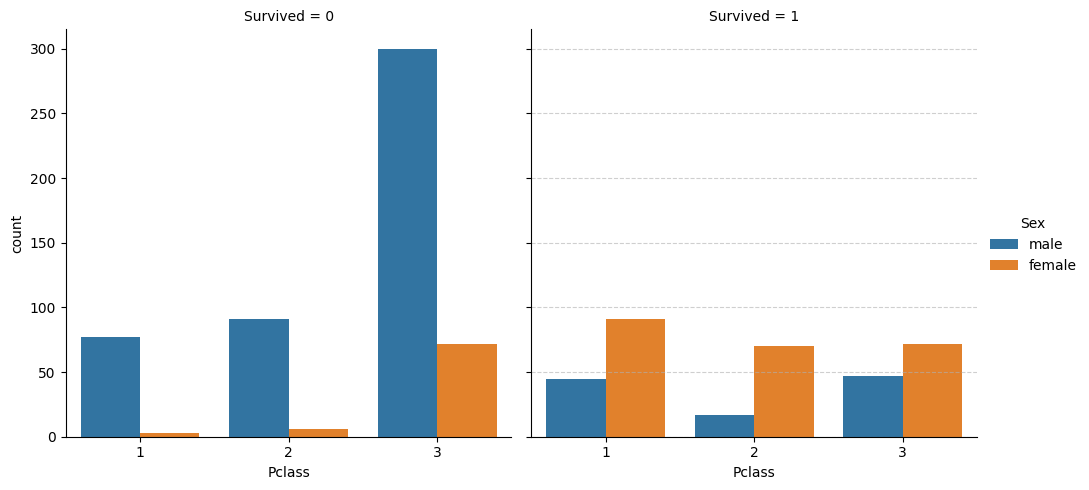

In [31]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count',data=titanic)
plt.grid(axis='y',linestyle = '--',alpha = 0.6)

# Major Insights and questions
1. Which passenger class had the highest survival rate?

Ans : First Class 

2. How does gender affect survival chances?

Ans : There is a drastic difference in Gender Survival
      Females have more than 80% survival rate while
      Males have around 40% chance which gives that there are differences

3. How does age group correlate with survival?

Ans: There is a correlation, majority surivor are of age around 25-40



4. Is there a link between fare paid and survival rate?

Ans : Yes According to the visuals the higher the fair paid the higher they have the    survival chance.


5. Did family presence (siblings/spouses or parents/children aboard) increase the chances of survival?

Ans : yes while the percentage of survival rate of single is less than 50% 
      that of family size of 2 or 3 has more survivor than that of dead